# Research Skills: Spatiotemporal Data Analysis
## Module 2 - Fundamentals for Time Series Analysis and Univariate Forecasting

Sharon Ong, Department of Cognitive Science and Artificial Intelligence – Tilburg University



In this practicum, the 'sktime' package will be used.

You will work with three time-series datasets:
1. The daily minimum temperature over 10 years (1981-1990) in Melbourne, Australia (daily-minimum-temperatures.csv).
2. The monthly totals of international airline passengers (in thousands) from January 1949 to December 1960.
3. The national solar data for the GB electricity network.

The Entry level exercises include
1. More visualizations and smoothing
2. White Noise and Random Walk Model with Autocorrelation
3. Decomposing a Time Series
4. Stationarity and Detecting Stationary
5. Univariate Forecasting
6. Univariate Forecasting with ARIMA

The Advanced Level exercises include
1. Grid search for ARIMA parameters
2. Univariate forecasting of a dataset on solar data


### 0. Setup
Please specify in the next cell if you are working from Google Colab or from your own computer. Also indicate if you already have the statsmodels library installed.

In [145]:
COLAB = True
SKTIME_INSTALLED = False
PDARIMA_INSTALLED = False

Now run the following to set up the notebook.

In [175]:
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    # Load the contents of the directory
    !ls
    # Change your working directory to the folder where you stored your files, e.g.
    %cd /content/drive/My Drive/Colab Notebooks/STDA

if not SKTIME_INSTALLED:
    !pip install sktime
    !pip install statsmodels

if not PDARIMA_INSTALLED:
    !pip install pmdarima

import itertools
from os.path import join

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
condacolab_install.log	       RS_STDA_03_sample_solution.ipynb       RS_STDA_06_solution.ipynb
data			       RS_STDA_03_v2_solution_libpysal.ipynb  RS_STDA_M5_solution.ipynb
RS_STDA_02_solution.ipynb      RS_STDA_04_province_solution.ipynb
RS_STDA_02_solution_old.ipynb  RS_STDA_06.ipynb
/content/drive/My Drive/Colab Notebooks/STDA


# 1. Additional Visualizations and Smoothing

In Worksheet 1, we covered visualizations of time series such as line plots, box plots, hisotgram plots and heatmaps. In this worksheet, we will impelement
Lag plots, QQ plots and Autocorrelation plots. The following code loads Minimum Daily Temperatures dataset, which describes the minimum daily temperatures over 10 years (1981-1990) in Melbourne, Australia.


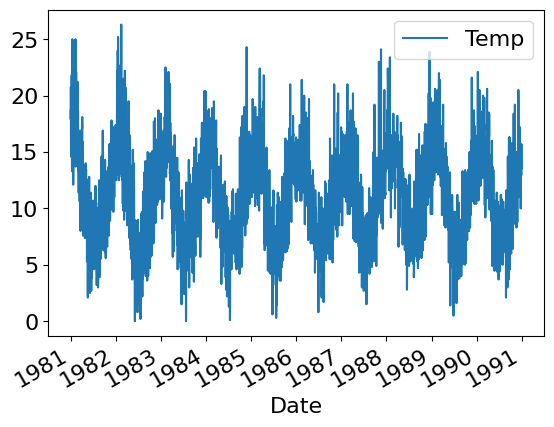

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
# load the dataset
temperatures =pd.read_csv(join('data', 'daily-minimum-temperatures.csv'), header=0, index_col=0, parse_dates=True)
temperatures.plot()
plt.show()


## 1.1 Lag plots, QQ plots and Autocorrelation plots
Lag plots explore the relationship between each observation and a lag of that observation in a scatter plot. ```sktime``` has a built-in function for exactly this called the ```plot_lags```. In a single figure, create 7 lag plots, for a lag of 1,2,3,4,5,6 and 7 days.

(<Figure size 800x1800 with 9 Axes>,
 array([<Axes: xlabel='y(t)', ylabel='y(t + 1)'>,
        <Axes: xlabel='y(t)', ylabel='y(t + 2)'>,
        <Axes: xlabel='y(t)', ylabel='y(t + 3)'>,
        <Axes: xlabel='y(t)', ylabel='y(t + 4)'>,
        <Axes: xlabel='y(t)', ylabel='y(t + 5)'>,
        <Axes: xlabel='y(t)', ylabel='y(t + 6)'>,
        <Axes: xlabel='y(t)', ylabel='y(t + 7)'>, <Axes: >, <Axes: >],
       dtype=object))

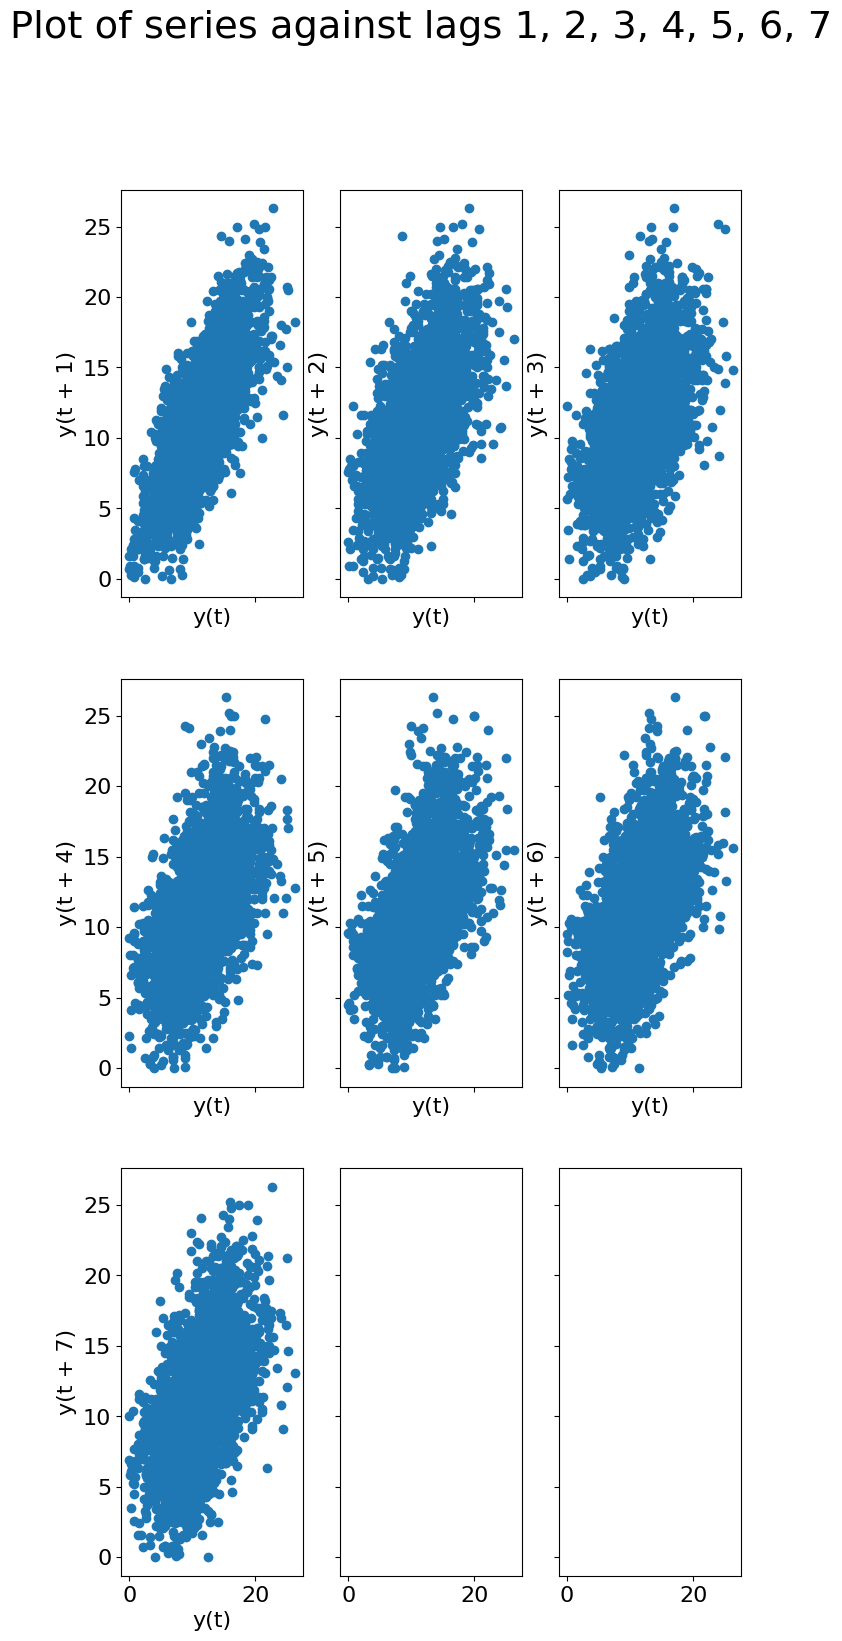

In [185]:
import numpy as np
from sktime.utils.plotting import plot_lags


#
# Your code goes here
#
plot_lags(temperatures,[1,2,3,4,5,6,7])


A Q-Q plot, or quantile plot, compares two distributions and can be used to see how similar or different they happen to be. The Q-Q plot can be used to quickly check the normality of the distribution of residual errors. The values are ordered and compared to an idealized Gaussian distribution. The comparison is shown as a scatter plot (theoretical on the x-axis and observed on the y-axis) where a match between the two distributions is shown as a diagonal line from the bottom left to the top-right of the plot.

The plot is helpful to spot obvious departures from this expectation. The code below creates a Q-Q plot of the residual errors when using a persistence model with the dataset.

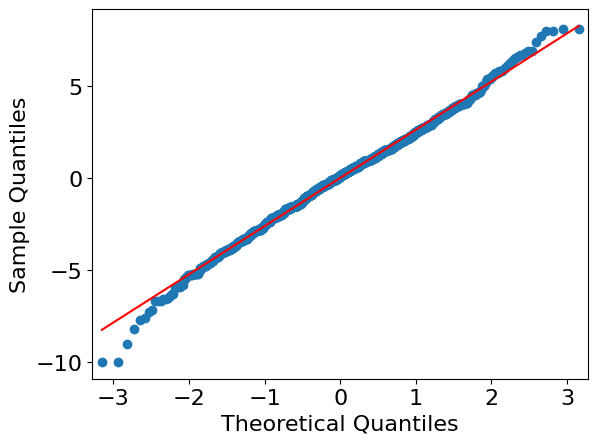

In [186]:
import statsmodels.api as sm

# Add lag variable
temperatures = pd.concat({'t': temperatures, 't-1': temperatures.shift(1)}, axis=1)

# Convert to ndarray and split into train and test sets
X = temperatures.values
trn_size = int(len(X) * 0.66)
y_trn, x_trn = X[:trn_size, 0], X[:trn_size, 1]
y_tst, x_tst = X[trn_size:, 0], X[trn_size:, 1]

# Persistence model predicts t+1 = t
residuals = y_tst - x_tst

# Create Q-Q plot of residuals
_ = sm.qqplot(residuals, line='r')

Autocorrelation and partial autocorrelations calculates the strength of the relationship between an observation and observations at prior time steps. The following code creates an autocorrelation and partial autocorrelation plot with the residual error time series. Are they any correlations?

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

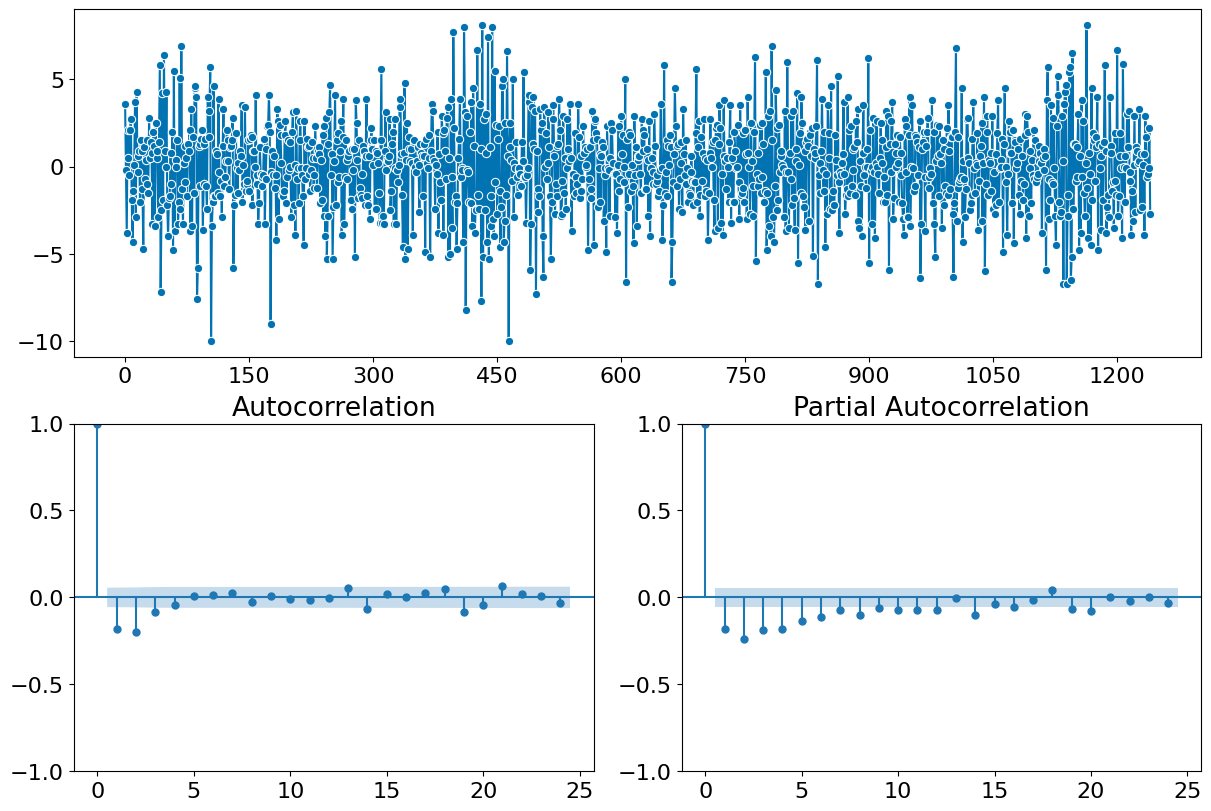

In [187]:
from sktime.utils.plotting import plot_correlations

residuals = pd.DataFrame(residuals)
plot_correlations(residuals)

## 1.2 Smoothing with moving average

Smoothing operations such as moving average smoothing can be used to remove noise in time series. The rolling() function in pandas series object
groups observations in a window. To create a new smoothed dataset, we can take the mean value in the window. The following code smoothes with time series with a moving average.

1. Plot original and transformed dataset in the same figure
2. Plot the first 36 points in original and transformed dataset in the same figure

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01  127.857143
1949-08-01  133.000000
1949-09-01  135.571429
1949-10-01  133.714286


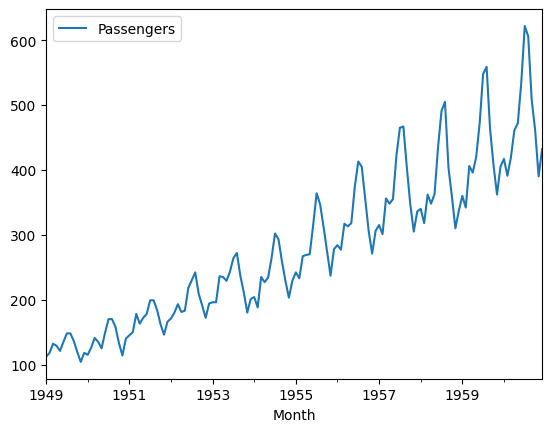

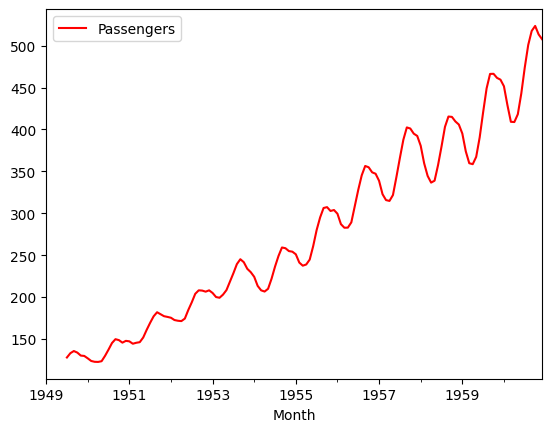

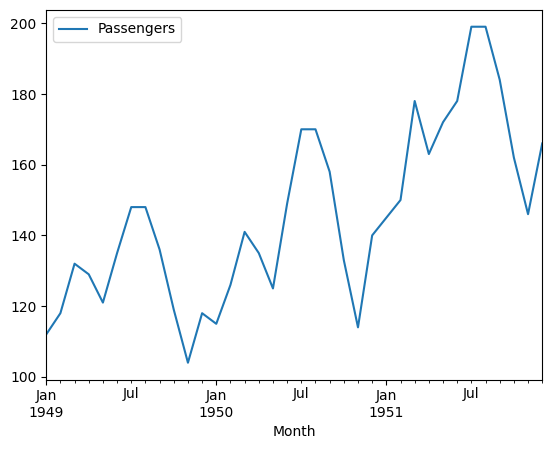

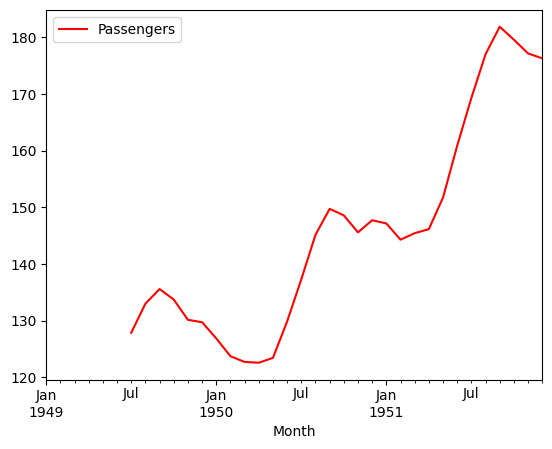

In [24]:
series = pd.read_csv('data/airline-passengers.csv', header=0, index_col=0, parse_dates=True)

rolling = series.rolling(window=7)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))

#
# Your code goes here
#


# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
plt.show()


# zoomed plot original and transformed dataset
series[:36].plot()
rolling_mean[:36].plot(color='red')
plt.show()


# 2. Autocolerrelation
Autocorrelation is the correlation between a time series and a delayed copy of itself. It can be used to find repetitive patterns or periodic signals in time series (and spatial) data.

#### 2.1 Autocorrelation of White Noise
1. Generate 1000 random normal observations for `returns` using np.random.normal() with mean (`loc`) of 0 and standard deviation (`scale`) of 1.
2. Verify the mean and standard deviation of returns.
3. Convert to the numpy array to a `pd.Series`.
4. Plot the time series.
5. Compute the autocorrelation and partial autocorrelation using `plot_autocorrelation`.


Mean:  0.011822932502008441
Standard Deviation:  1.0636675172256502


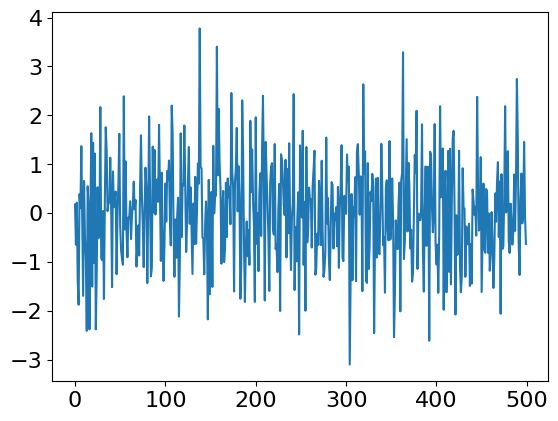

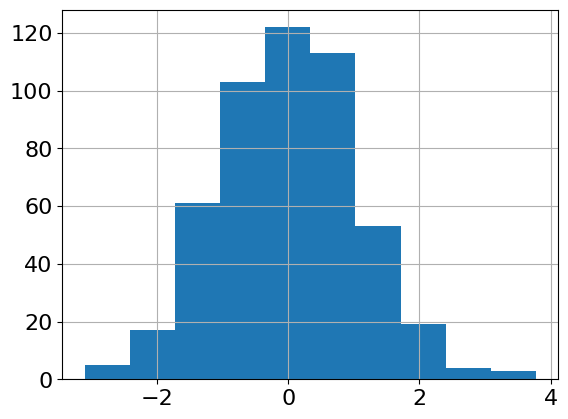

-0.08972257130694974
0     1.000000
1    -0.006817
2    -0.089651
3    -0.030789
4     0.010608
5    -0.014742
6    -0.043517
7     0.050380
8    -0.079871
9    -0.045126
10   -0.015083
11    0.034865
12    0.018412
dtype: float64


(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

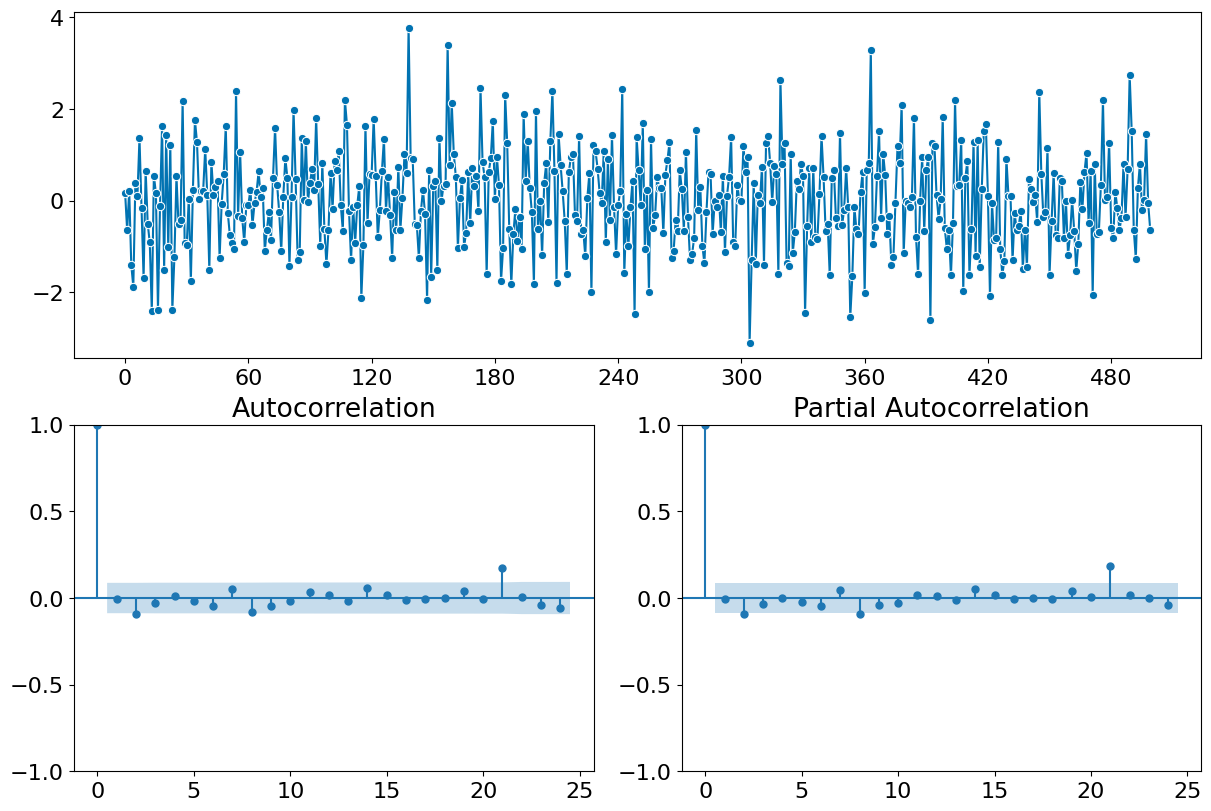

In [27]:
#
# Your code goes here
#
import pandas as pd
from pandas.plotting import autocorrelation_plot
from sktime.transformations.series.acf import AutoCorrelationTransformer

from sktime.utils.plotting import plot_correlations
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 16})

#
# Your code goes here
#

# 1
white_noise = np.random.normal(loc = 0, scale = 1, size = 500)

# 2
print("Mean: ",white_noise.mean())
print("Standard Deviation: ",white_noise.std())


# 3
white_noise = pd.Series(white_noise)
white_noise.describe()

#4
white_noise.plot()
plt.show()
# histogram plot
white_noise.hist()
plt.show()
#5
# you can also print out the autocorrealtion
# this code displays the autocorrelation at lag =2
print(white_noise.autocorr(lag=2))
# this code displays the autocorrelation from lag = 0 to lag = 12
transformer = AutoCorrelationTransformer(n_lags=12)
y_hat = transformer.fit_transform(white_noise)
print(y_hat)
#6

plot_correlations(white_noise)


## 2.2 Autocolerrelation of a Random Walk

Below is code which generates a random walk.
1. Plot the time series
2. Compute the autocorrelation. Display the autocorelleation in a plot. How does the autocorrelation of a random walk compare to one of white noise.

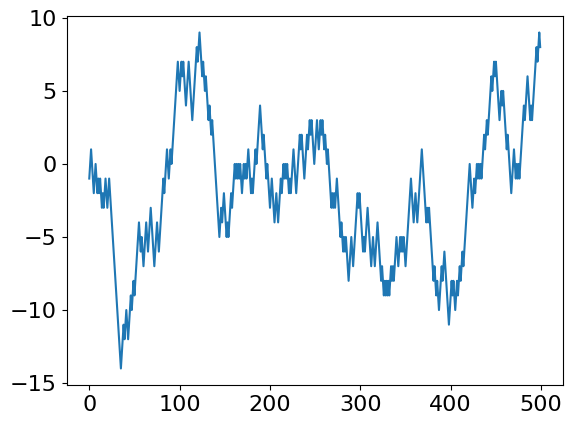

<Figure size 640x480 with 0 Axes>

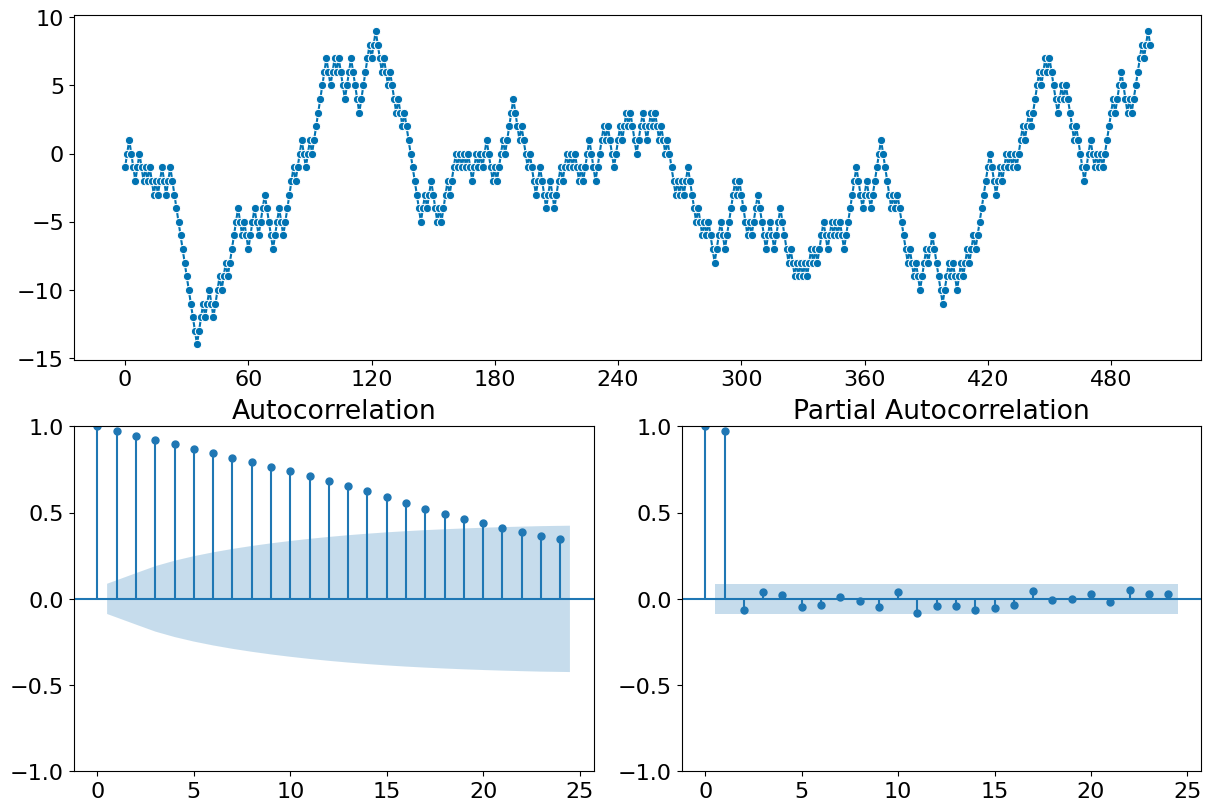

In [28]:
from random import seed
from random import random
import matplotlib.pyplot as plt
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 500):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

#
# Your code goes here
#1
plt.plot(random_walk)
plt.show()

#2
plt.figure()
plot_correlations(pd.Series(random_walk))
plt.show()

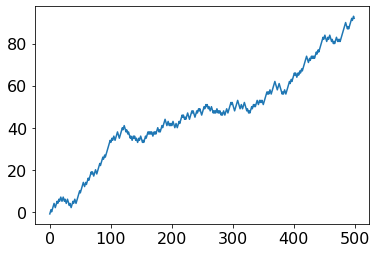

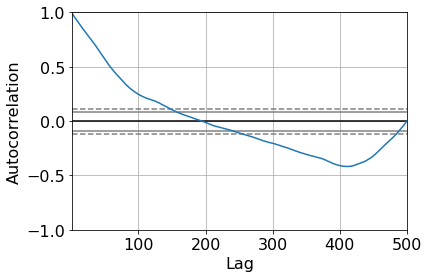

In [ ]:
from random import seed
from random import random
import matplotlib.pyplot as plt
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.4 else 1)
for i in range(1, 500):
    movement = -1 if random() < 0.4 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

#
# Your code goes here
#1
plt.plot(random_walk)
plt.show()

#2
plt.figure()
autocorrelation_plot(random_walk)
plt.show()

# 3. Decomposing a Time Series
The components of a time series are trend, seasonality, base level and residual (noise). You can decompose a time series to return the trend, seasonal and residual component with the ```STLTransformer``` and set ```return_components=True```.

The following code load and decomposes the time series and displays the trend, seasonal and residual components. We set the seasonal periodicity parameter ```sp``` to 365 (the number of days in 1 year).

Plot the results of the decomposition (result.plot()), plot the autocorrelation and partial autocorrelation of the residuals.

Try changing the value of ```sp``` to another number (e.g. 25)

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: ylabel='resid'>,
        <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

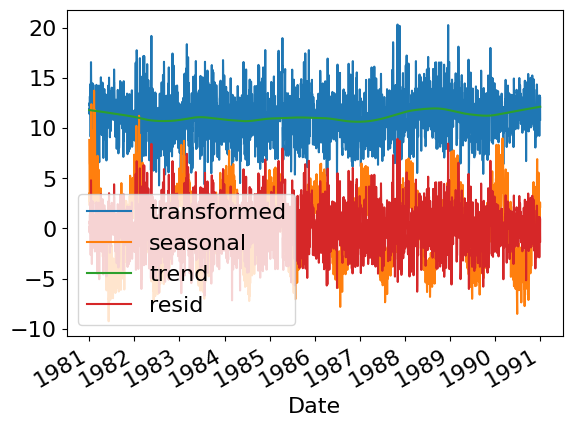

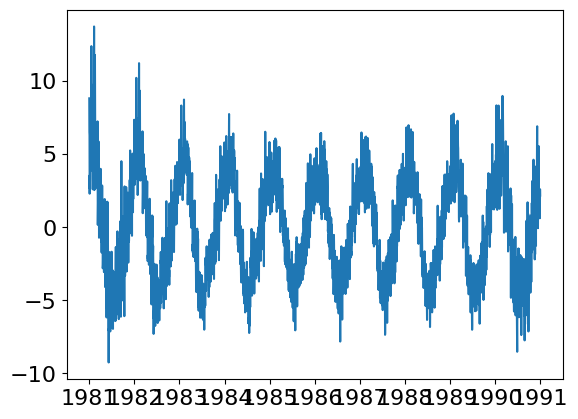

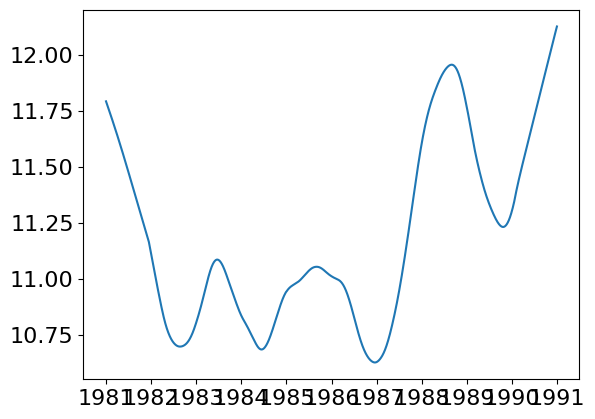

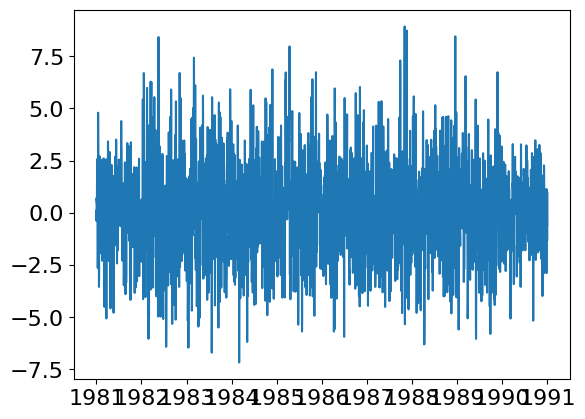

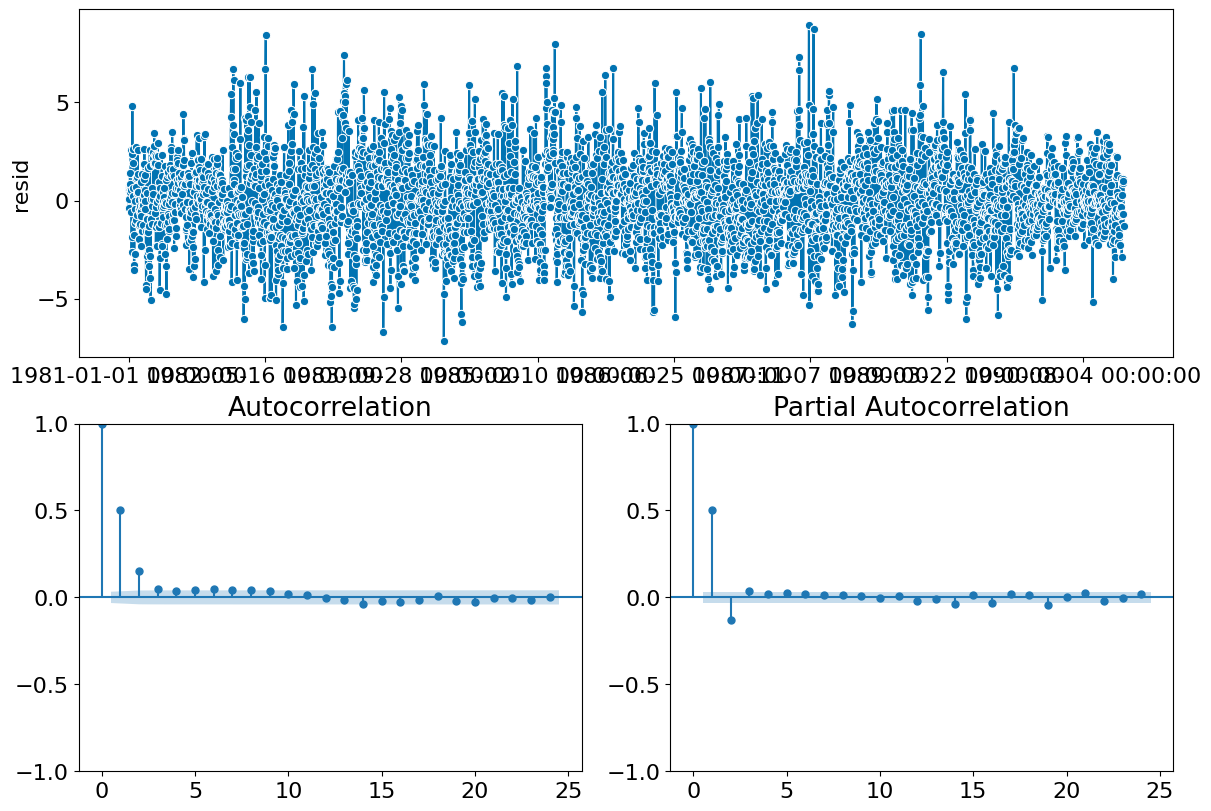

In [189]:
from sktime.transformations.series.detrend import STLTransformer
series = pd.read_csv(join('data', 'daily-minimum-temperatures.csv'), header=0, index_col=0, parse_dates=True)

transformer = STLTransformer(sp=364, return_components=True)

result =  transformer.fit_transform(series)
result.plot()
plt.figure()
plt.plot(result.seasonal)
plt.figure()
plt.plot(result.trend)
plt.figure()
plt.plot(result.resid)

#
# Your code goes here
#
plot_correlations(pd.Series(result.resid))


The code below loads a dataset of monthly totals of international airline passengers.

Decomposes the time series and displays the trend, seasonal and residual components. You have the chose the rights seasonal periodity.


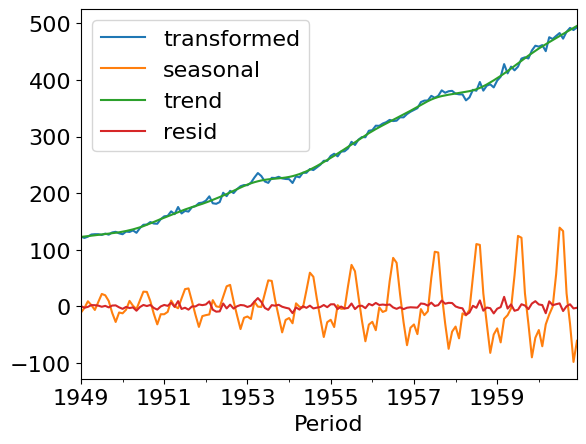

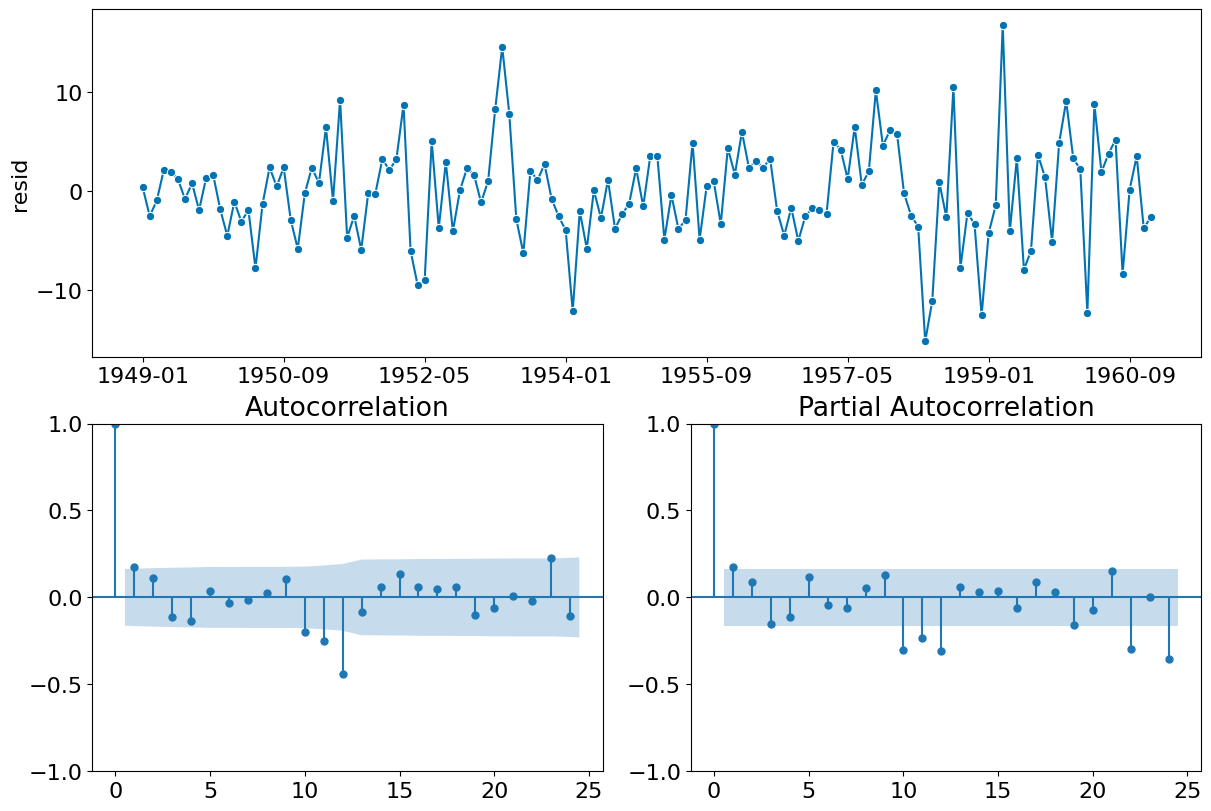

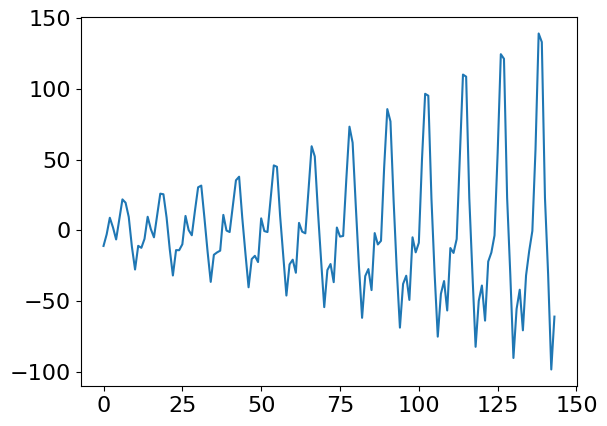

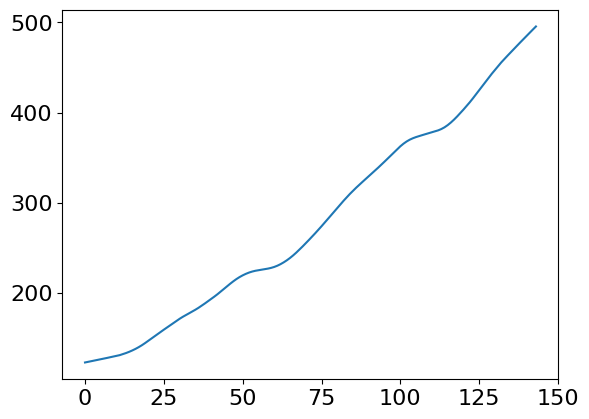

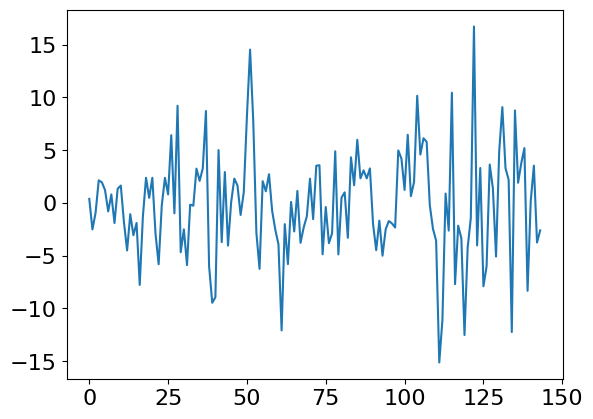

In [35]:
from sktime.datasets import load_airline


X = load_airline()

#
# Your code goes here
#
transformer = STLTransformer(sp=12, return_components=True)

result =  transformer.fit_transform(X)
result.plot()
plot_correlations(pd.Series(result.resid))
plt.figure()
plt.plot(result.seasonal.values)
plt.figure()
plt.plot(result.trend.values)
plt.figure()
plt.plot(result.resid.values))

In [ ]:
from sktime.param_est.seasonality import SeasonalityACF
from sktime.transformations.series.difference import Differencer



# 4. Stationarity

The observations in a stationary time series are not dependent on time. Time series are stationary if they do not have trend or seasonal effects. The summary statistics of a stationary time series are consistent over time. Time series that are stationary are easier to model.

We will explore two datasets to test for stationarity;
A. The daily minimum temperature (daily-minimum-temperatures.csv) and
B. The monthly totals of international airline passengers (load_airline()).  

For each dataset
1. Load the dataset with pandas
2. Plot a histogram of the observations (use the .hist() function). For dataset A, it's the 'Temp' column. For dataset B, take the 'Passengers' column.  Calculate the overall mean and variance.
3. Split the time series into two contiguous sequences. Calculate the mean and variance of each group of numbers and compare the value.
4. Plot the autocorrelation. Which of these two datasets are stationary?

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64
(3650,)
11.177753424657539
16.579855735292522
11.177753424657535
11.043506849315069
11.312000000000001


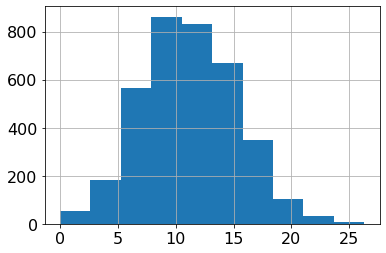

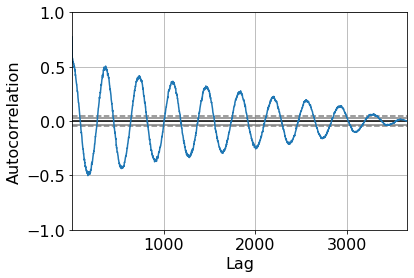

In [ ]:
data1 = pd.read_csv('data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


print(data1.head())


#
# Your code goes here
#
X = data1.values
print(X.shape)

plt.show()
data1.hist()
print(data1.mean())
print(data1.var())
#print(acf(data1['Temp']))
#print(data1['Births'].autocorr(lag=30))

plt.figure()
plot_correlations(data1)


split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
print(X.mean())
print(X1.mean())
print(X2.mean())

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

280.2986111111111
14391.9172008547
280.2986111111111
182.90277777777777
377.69444444444446


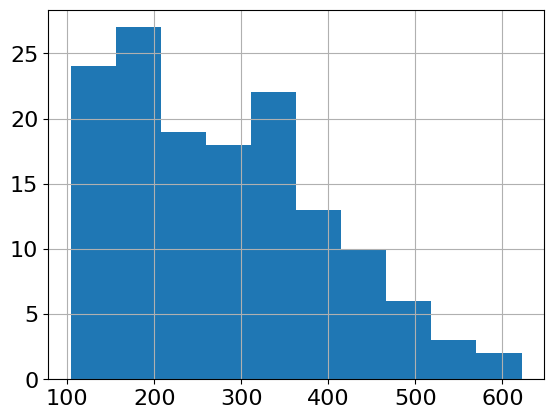

<Figure size 640x480 with 0 Axes>

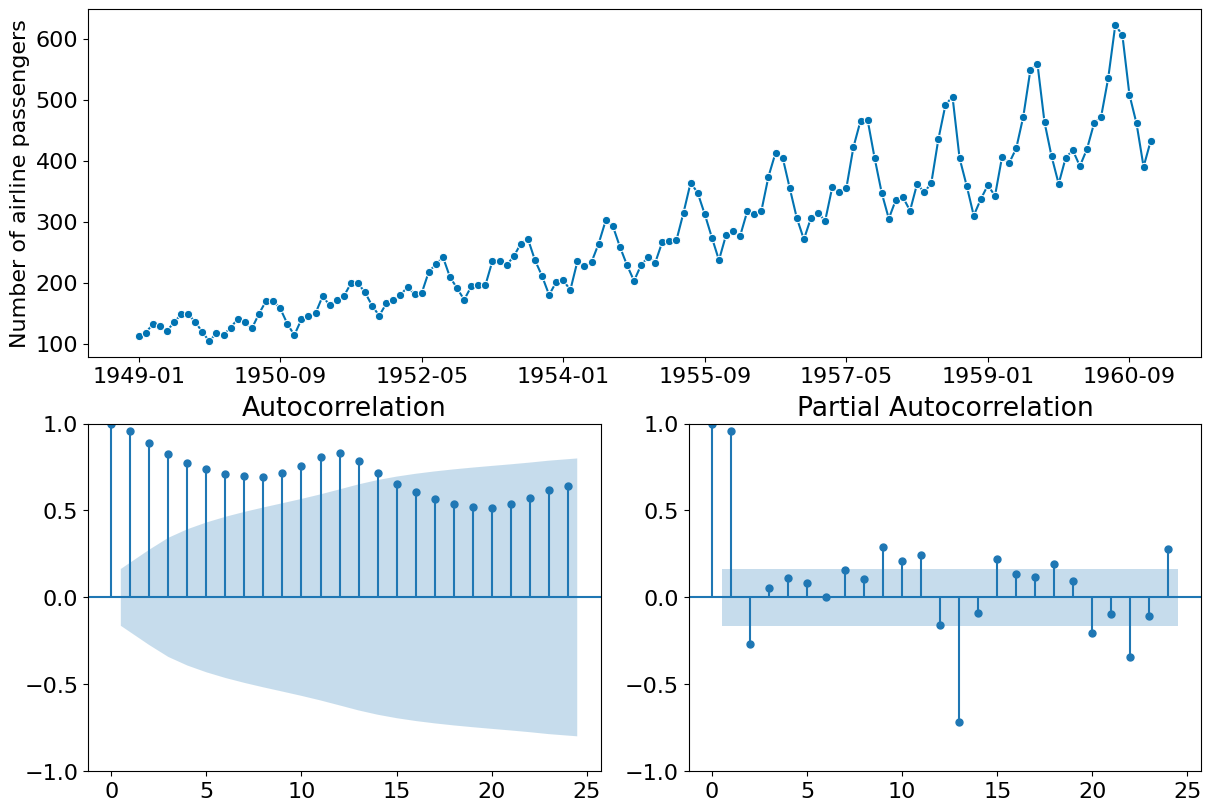

In [42]:
data2 = load_airline()
display(data2)
data2.hist()
print(data2.mean())
print(data2.var())
#print(data1['Births'].autocorr(lag=30))

plt.figure()
plot_correlations(data2)

X = data2.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
print(X.mean())
print(X1.mean())
print(X2.mean())


## 4.1 Stationarity Checks
The Augmented Dickey-Fuller test determines how strongly a time series is defined by a trend. A positive ADF result would indicate a non-stationary time series.
The following code perform an Augmented Dickey-Fuller test. ('result = adfuller(data1)') and displays the relevant statistics.


1. Perform an Augmented Dickey-Fuller test on the monthly airline passengers dataset (load_airline()). Print out the ADF statistics and the second is the p-value.
2. Perform a log transformation on the passengers values in the monthly airline passengers dataset. Compute the Augmented Dickey-Fuller statistics on the transformed data
```


In [190]:
from sktime.param_est.stationarity import StationarityADF

data1 = pd.read_csv(join('data', 'daily-minimum-temperatures.csv'), header=0, index_col=0, parse_dates=True)

sty_est = StationarityADF()
sty_est.fit(data1)

print('Stationary:', sty_est.get_fitted_params()["stationary"])
print('ADF Statistic:', sty_est.get_fitted_params()["test_statistic"])
print('p-value:', sty_est.get_fitted_params()["pvalue"])

data2 = load_airline()

#
# Your code goes here
#



Stationary: True
ADF Statistic: -4.4448049246117
p-value: 0.0002470826300360994
Stationary: False
ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Stationary: False
ADF Statistic: -1.7170170891069683
p-value: 0.4223667747703874


# 5. Univariate Forecasting

## 5.1 Naive Forecaster

The Naive Forecaster based on naive assumptions about past trends continuing. The following code
1. perform a time series split into training and testing
2. specifies the forecasting horizon
3. makes a copy of the Naive Forcaster which will forecast with the last value of each season in the last window.
4. fits the forecaster to the training data
5. makes a predicting given the forecasting horizon
6. computes the root mean square error between the predicted and acutal test data.




0.5293011601367066
Temp    float64
dtype: object
20.8971
4.571334597248379


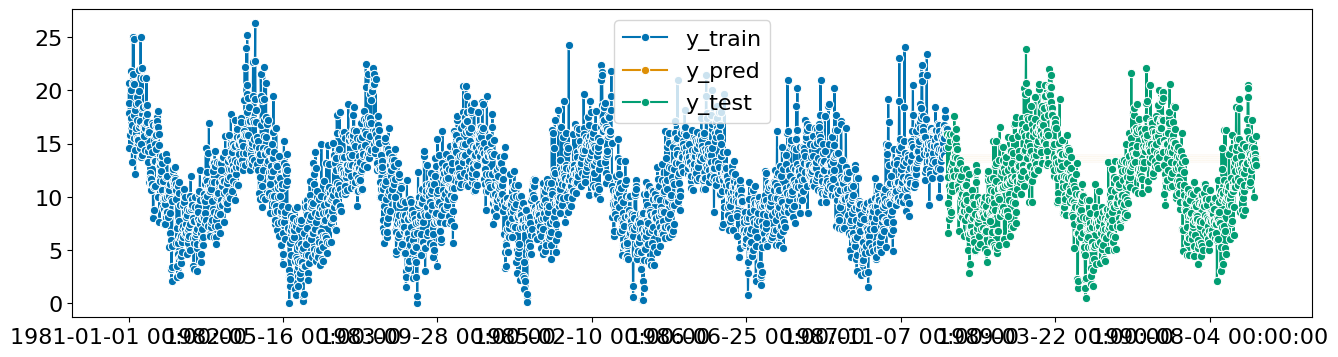

In [130]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.model_evaluation import evaluate
from sktime.split import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sktime.performance_metrics.forecasting import median_absolute_percentage_error

tst_size = 1000

# Load data
temperatures = pd.read_csv(join('data', 'daily-minimum-temperatures.csv'), header=0, index_col=0, parse_dates=True)

# we will try to forecast y_test from y_train

# Split data
y_train, y_test = temporal_train_test_split(temperatures, test_size=tst_size)

# Specifying forecasting horizon
fh = np.arange(1, tst_size+1)

# Specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last")

# Fitting the forecaster
forecaster.fit(y_train.values)

# step 5: querying predictions
y_temp = forecaster.predict(fh=fh)

y_pred = y_test.copy()
y_pred['Temp'] = y_temp

plot_series(y_train,y_pred, y_test, labels=["y_train", "y_pred", "y_test"])


training_score = forecaster.score(y=y_test.values,fh=fh)
print(training_score)

print(y_train.dtypes)
mse = MeanSquaredError()
print(mse(y_test, y_pred))

mse = MeanSquaredError(square_root=True)
print(mse(y_test, y_pred))


Apply the Naive forecaster to predict the monthly airline passengers.  The Naive Forcaster has  seasonal periodicity parameter ```sp```. Set an appropriate value for ```sp```. Display the training, predicted and test set and the rmse error.

float64
14674.555555555555
14674.555555555555


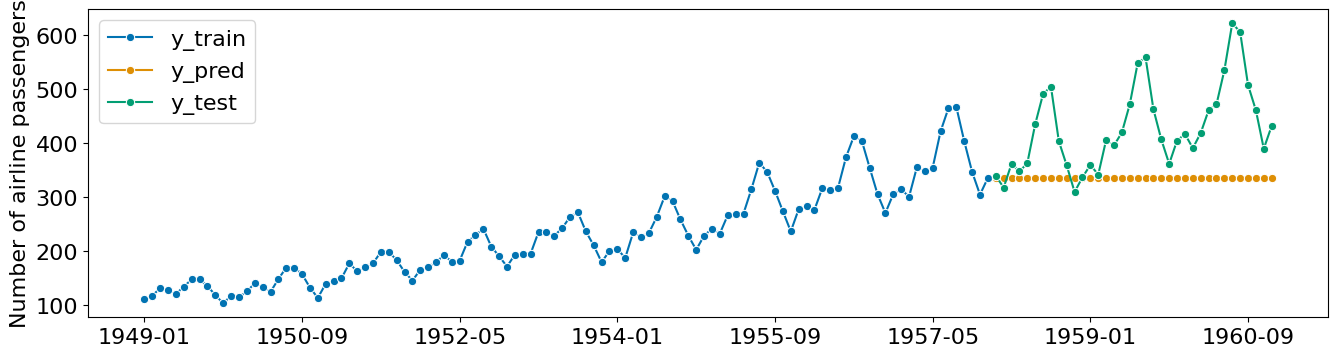

In [197]:
from sktime.split import temporal_train_test_split
from sktime.performance_metrics.forecasting import MeanSquaredError

tst_size = 36
# step 1: data specification
y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=tst_size)

#
# Your code goes here
#

# step 2: specifying forecasting horizon
fh = np.arange(1, tst_size+1)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last")
y_train= y_train.asfreq('M')

# step 4: fitting the forecaster
forecaster.fit(y_train)
print(y_train.dtypes)
# step 5: querying predictions
y_pred = forecaster.predict(fh=fh)

plot_series(y_train,y_pred, y_test, labels=["y_train", "y_pred", "y_test"])
training_score = forecaster.score(y=y_test.values,fh=fh)
mse = MeanSquaredError()
print(mse(y_test, y_pred))

mse = MeanSquaredError()
print(mse(y_test, y_pred))

## 5.2 Autoregression
In linear regression we assume that y and x are related with the following equation:
\begin{equation}
\hat{y} = mx + b
\end{equation}
where $\hat{y}$ is the prediction,  $m$ and $b$ are the coefficients found from the data and $x$ is the input data.

We can use this technique on time series data where the inputs are the observations at the previous time steps (lag variables).
A regression model that uses data from the same input variable at previous time steps is called a temporal autoregression. With autoregression, we can predict
For example, we can predict the value for the next time step (t+1) given the observations at the current (t and
previous t-1).\
\begin{equation}
y(t+1) = b_{1} y(t) +  b_{2} y(t-1) + b_{0}
\end{equation}

The following code initializes an Autoregressor in sktime with a seasonal periodity of 12 and a constant trend.

1. Fit the autoregressor on the training data and perform forecasting with horizon of 36 months.  
2. Plot your training, test and predicted time series
3. Evaluate the rsme error  


51.5675603451999


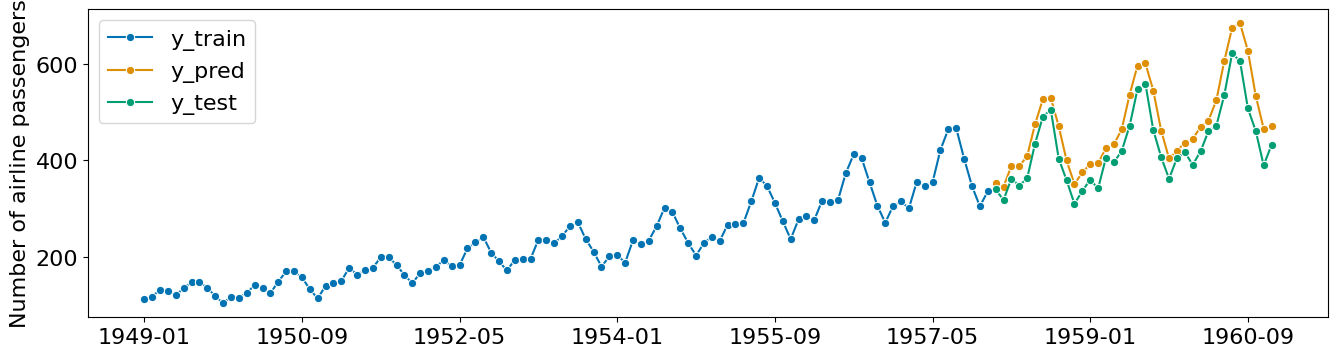

In [137]:
from sktime.forecasting.auto_reg import AutoREG
y_train= y_train.asfreq('M')
y_train.dropna()
autoreg_sktime = AutoREG(lags=12, trend="c")

#
# Your code goes here
#


autoreg_sktime.fit(y=y_train)

y_pred = autoreg_sktime.predict(fh=fh)

plot_series(y_train,y_pred, y_test, labels=["y_train", "y_pred", "y_test"])
mse = MeanSquaredError(square_root=True)
print(mse(y_test, y_pred))

In [ ]:
The following code initializes an Autoregressor in sktime with a seasonal periodity of 12 and a constant trend.


/usr/local/lib/python3.10/dist-packages/sktime/forecasting/base/_fh.py:959: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  return x.to_period(freq)
/usr/local/lib/python3.10/dist-packages/sktime/forecasting/base/_fh.py:959: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  return x.to_period(freq)
/usr/local/lib/python3.10/dist-packages/sktime/forecasting/base/_fh.py:959: UserWarning: Converting to Period representation will drop timezone information.
  return x.to_period(freq)
/usr/local/lib/python3.10/dist-packages/sktime/forecasting/base/_fh.py:959: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  return x.to_period(freq)


0.20294779456469392


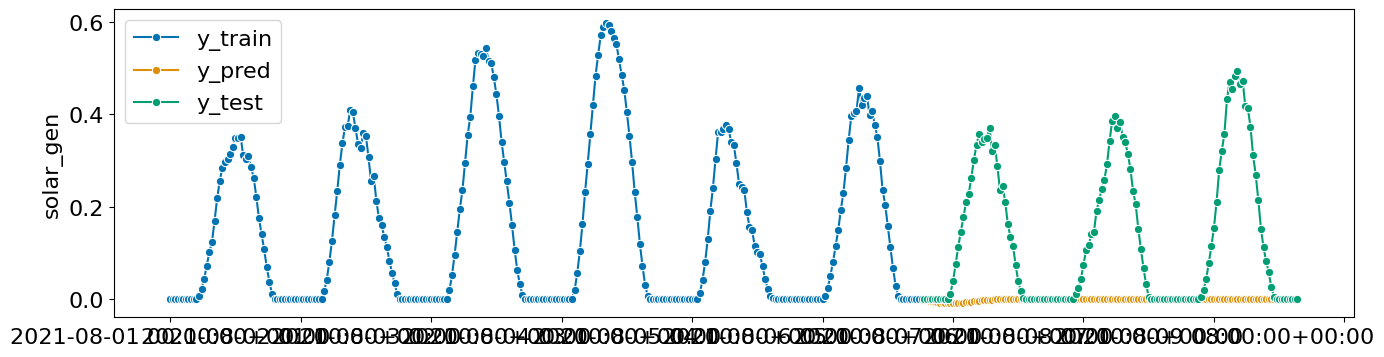

In [193]:
#
# Your code goes here
#

autoreg_sktime = AutoREG(lags=12, trend="n")
autoreg_sktime.fit(y=y_train)

y_pred = autoreg_sktime.predict(fh=fh)

plot_series(y_train,y_pred, y_test, labels=["y_train", "y_pred", "y_test"])
mse = MeanSquaredError(square_root=True)
print(mse(y_test, y_pred))

# 6. ARIMA models
Autoregressive Integrated Moving Average models (ARIMA) comprises of the following aspects
* AR: Autoregression, which uses the dependent relationship between an observation and a number of lags.
* I: Integrated. The use of differencing of raw observations in order to make the time series stationary.
* MA: Moving Average, which uses the dependency between an observation and residual errors from a moving average model applied to lagged observations.

The parameters of the ARIMA model are
* p: The number of lag observations included in the model, also called the lag order.
* d: The number of times that the raw observations are differenced
* q: The size of the moving average window, also called the order of moving average.

The following code fits an ARIMA with autoregressive lag of 5, d = 1, and q = 1

71.11064611849984


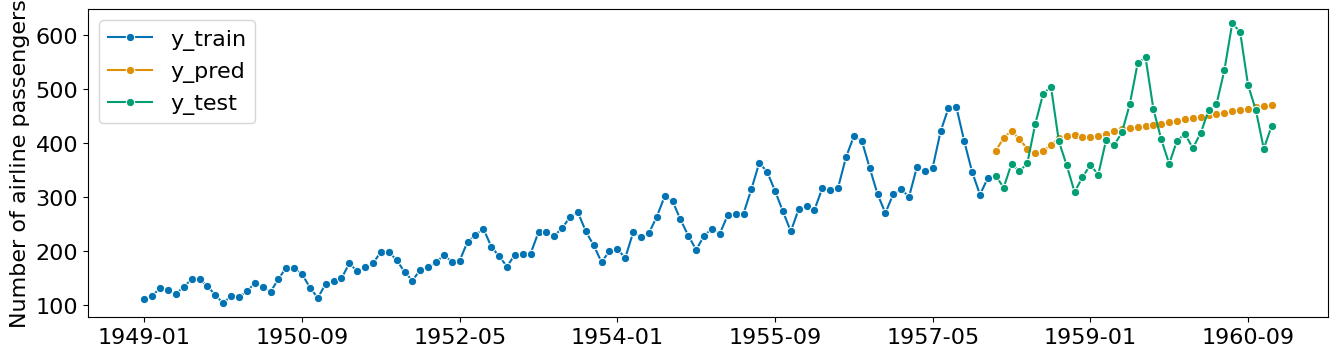

In [147]:
from sktime.forecasting.arima import ARIMA

forecaster = ARIMA(order=(5, 1, 1), suppress_warnings=True)
forecaster.fit(y=y_train)

y_pred = forecaster.predict(fh=fh)

plot_series(y_train,y_pred, y_test, labels=["y_train", "y_pred", "y_test"])
mse = MeanSquaredError(square_root=True)
print(mse(y_test, y_pred))

# Advanced Section

With 'for' loops, implement grid search to find the optimal p ,d q values for ARIMA. The values for each parameter for grid search are:
* p = [3, 8, 12, 16]
* d = [0,1]
* q = [0,1,2]

In [202]:
#
# Your code goes here
#

p_values = [4, 8, 12, 16]
d_values = range(0, 2)
q_values = range(0, 4)
best_score, best_cfg = float("inf"), None

for p in p_values:
    for d in d_values:
        for q in q_values:
            arima_order=(p,d,q)
            try:
                forecaster = ARIMA(order=arima_order, suppress_warnings=True)
                forecaster.fit(y_train)
                y_pred = forecaster.predict(fh=fh)

                mse = MeanSquaredError(square_root=True)
                rmse =  mse(y_test, y_pred)
                if rmse < best_score:
                    best_score, best_cfg = rmse, arima_order
                    print('ARIMA%s RMSE=%.3f' % (arima_order,rmse))
            except:
                continue

print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

ARIMA(4, 0, 0) RMSE=164.713
ARIMA(4, 0, 3) RMSE=78.039
ARIMA(4, 1, 0) RMSE=71.402
ARIMA(4, 1, 1) RMSE=70.976
ARIMA(4, 1, 2) RMSE=70.054
ARIMA(8, 1, 0) RMSE=61.448
ARIMA(8, 1, 1) RMSE=43.656
ARIMA(8, 1, 2) RMSE=29.746
ARIMA(12, 1, 0) RMSE=24.657
ARIMA(12, 1, 1) RMSE=23.922
Best ARIMA(12, 1, 1) RMSE=23.922



The following code load another dataset, the extract national solar data for the GB electricity network.

1. Preform exploratory data analysis; plot the autocorrelations and decompose the time series
2. Split the data into training and testing. The size of the test set is given (144).
3. Compare the performance of a Naive forecaster, Autoregressor and ARIMA model on the dataset. [link text](https://)

/usr/local/lib/python3.10/dist-packages/sktime/forecasting/base/_fh.py:959: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  return x.to_period(freq)
/usr/local/lib/python3.10/dist-packages/sktime/forecasting/base/_fh.py:959: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  return x.to_period(freq)
/usr/local/lib/python3.10/dist-packages/sktime/forecasting/base/_fh.py:959: UserWarning: Converting to Period representation will drop timezone information.
  return x.to_period(freq)
/usr/local/lib/python3.10/dist-packages/sktime/forecasting/base/_fh.py:959: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  return x.to_period(freq)


0.0432030361786724


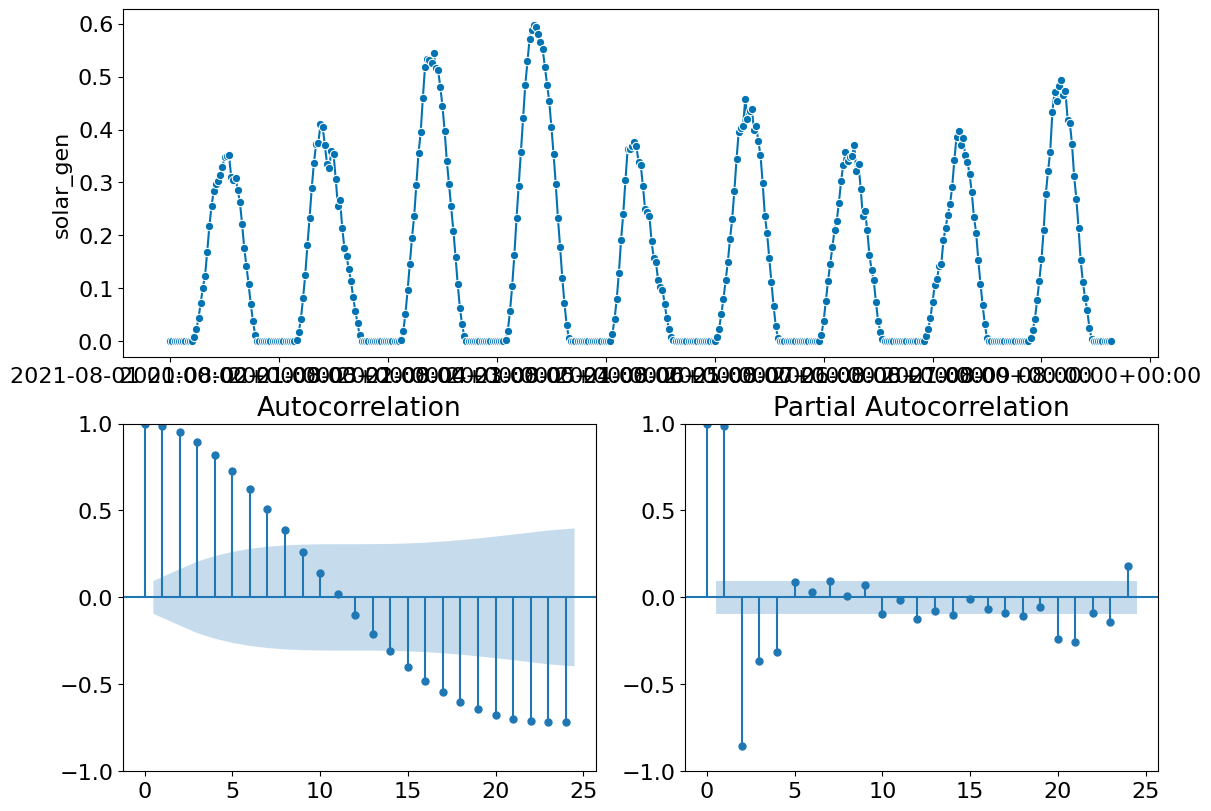

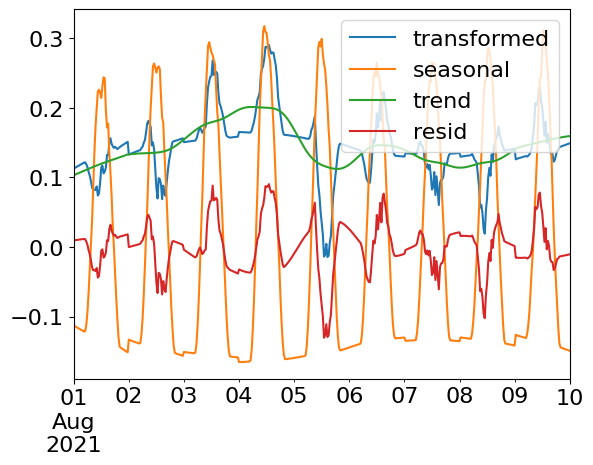

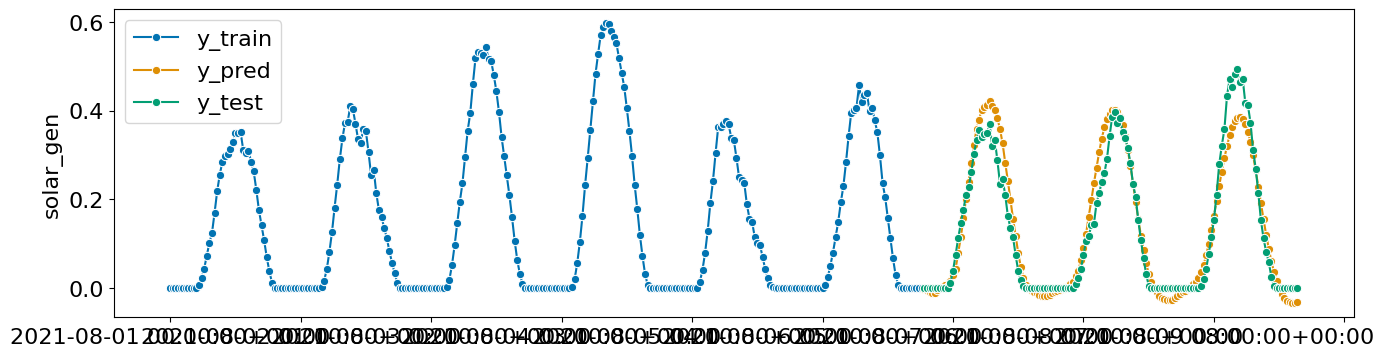

In [169]:
# have a new dataset
# and try
from sktime.datasets import load_lynx, load_solar
tst_size = 144

y = load_solar(start='2021-08-01', end='2021-08-10', normalise=True, return_full_df=False, api_version='v4')

#
# Your code goes here
#

plot_correlations(y)


decompose = STLTransformer(sp=48, return_components=True)

result =  decompose.fit_transform(y)

y_train, y_test = temporal_train_test_split(y, test_size=tst_size)


result.plot()
fh = np.arange(1, tst_size+1)

autoreg_sktime = AutoREG(lags=48, trend="n")
autoreg_sktime.fit(y=y_train)

y_pred = autoreg_sktime.predict(fh=fh)

plot_series(y_train,y_pred, y_test, labels=["y_train", "y_pred", "y_test"])
mse = MeanSquaredError(square_root=True)
print(mse(y_test, y_pred))